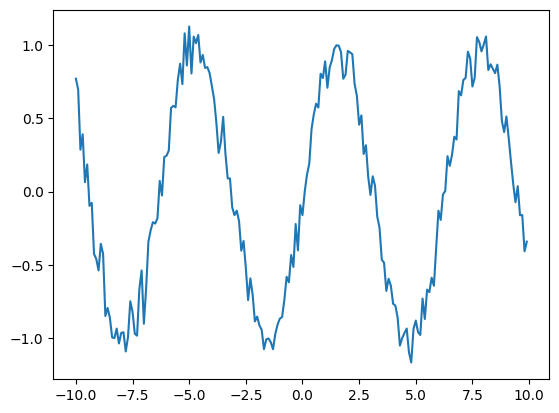

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.sin(x)+0.1*np.random.randn(len(x),1)

plt.plot(x,y)
plt.show()


In [16]:
class RNN:
    def __init__(self,x,n_neurons):
        self.n_neurons = n_neurons
        self.x_t = x
        self.t = max(x.shape)
        self.y_hat = np.zeros((self.t,1))
        
        self.H = [np.zeros((self.n_neurons,1)) for _ in range(self.t+1)]

        self.Wx = 0.1*np.random.randn(self.n_neurons,1)
        self.Wh = 0.1*np.random.randn(self.n_neurons,self.n_neurons)
        self.Wy = 0.1*np.random.randn(1,self.n_neurons)
        self.bias = 0.1*np.random.randn(self.n_neurons,1)

    def forward(self,xt,ht_1):
        out = np.dot(self.Wx,xt)+np.dot(self.Wh,ht_1)+self.bias
        ht = np.tanh(out)
        y_hat_t = np.dot(self.Wy,ht)

        return ht , y_hat_t,out 

In [17]:
r=RNN(x,500)
ht=r.H[0]
# r.y_hat.shape
for t,xt in enumerate(x):
    xt = xt.reshape(1,1)
    ht,y_hat_t,out=r.forward(xt,ht)
    r.H[t+1]=ht
    r.y_hat[t]=y_hat_t


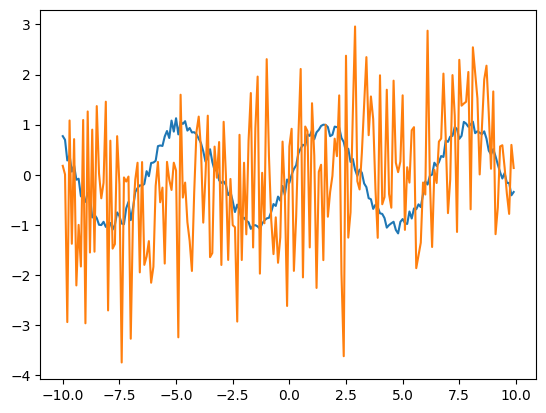

In [18]:
plt.plot(x,y)
plt.plot(x,r.y_hat)
plt.show()

In [ ]:
class Tanh:
    def forward(self,inputs):
        self.inputs = inputs
        self.outputs = np.tanh(self.inputs)

    def backward(self,dvalues):
        der = 1-self.outputs**2
        self.dinputs = np.multiply(der,dvalues) 

class RNN:
    def __init__(self,x,n_neurons,Activation):
        self.n_neurons = n_neurons
        self.x_t = x
        self.t = max(x.shape)
        self.y_hat = np.zeros((self.t,1))
        
        self.H = [np.zeros((self.n_neurons,1)) for _ in range(self.t+1)]

        self.Wx = 0.1*np.random.randn(self.n_neurons,1)
        self.Wh = 0.1*np.random.randn(self.n_neurons,self.n_neurons)
        self.Wy = 0.1*np.random.randn(1,self.n_neurons)
        self.bias = 0.1*np.random.randn(self.n_neurons,1)

        self.Activation = Activation

    
    def forward(self):
        self.dWx = np.zeros((self.n_neurons,1))
        self.dWh = np.zeros((self.n_neurons,self.n_neurons))
        self.dWy = np.zeros((1,self.n_neurons))
        self.dbias = np.zeros((self.n_neurons,1))

        x_t = self.x_t
        H=self.H
        y_hat =self.y_hat
        ht = H[0]

        Activation = self.Activation
        Act = [Activation for t in range(self.t)]

        [Act,H,y_hat]=self.RNN_cell(x_t,ht,Act,H,y_hat)

        self.y_hat = y_hat
        self.H = H
        self.Act = Act

    def RNN_cell(self,x_t,ht,Act,H,y_hat):

        for t,xt in enumerate(x_t):

            xt = xt.reshape(1,1)
            out = np.dot(self.Wx,xt)+np.dot(self.Wh,ht)+self.bias
            Act[t].forward(out)
            ht = Act[t].outputs
            y_hat_t = np.dot(self.Wy,ht)

            H[t+1]=ht
            y_hat[t]=y_hat_t

        return Act,H,y_hat
    
    def backward(self,dvalues):

        dht = np.dot(self.Wy.T,dvalues[-1].reshape(1,1))
        for t in reversed(range(self.t)):
            dy = dvalues[t].reshape(1,1)
            xt = self.x_t[t].reshape(1,1)

            self.Act[t].backward(dht)
            dtanh = self.Act[t].dinputs 

            self.dWy += np.dot(self.H[t+1],dy).T
            self.dWx += np.dot(dtanh,xt)
            self.dWh += np.dot(dtanh,self.H[t].T)
            self.dbias += dtanh

            if t > 0:
                dht = np.dot(self.Wh, dtanh) + np.dot(self.Wy.T, dvalues[t - 1].reshape(1, 1))



import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.sin(x)+0.1*np.random.randn(len(x),1)

r = RNN(x,500,Tanh())
for i in range(200):
    r.forward()
    y_hat = r.y_hat
    t=r.t
    H=r.H

    dy = y_hat - y
    L = 0.5*np.dot(dy.T,dy)/t
    print(float(L))
    r.backward(dy)
    r.Wh -= 0.001*r.dWh
    r.Wx  -= 0.001*r.dWx
    r.Wy -= 0.001*r.dWy
    
plt.plot(x,y)
plt.plot(x,y_hat)
plt.show()

/tmp/ipykernel_7521/26028307.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(L))


1.8577871218479598
4.0609010613899095
19928.82064132028
136806571.88239694
940411190921.8082
6464459255276161.0
4.443719514558533e+19
3.05464731860672e+23
2.099788299085914e+27
1.4434107905423443e+31
9.922117916177762e+34
6.820540942855567e+38
4.6884928345106326e+42
3.2229064004495647e+46
2.215450899189224e+50
1.5229181604633889e+54
1.0468657754130143e+58
7.196236673660941e+61
4.946748998735021e+65
3.4004336941904796e+69
2.3374845401581556e+73
1.60680503337358e+77
1.10453026358839e+81
7.5926268454686375e+84
5.219230682484386e+88
3.587739720574286e+92
2.466240157919089e+96
1.695312645355216e+100
1.1653710837010827e+104
8.010851369790129e+107
5.50672146978797e+111
3.785363121350516e+115
2.6020880189954935e+119
1.7886955204932172e+123
1.2295631975845344e+127
8.45211294786175e+130
5.8100481068197156e+134
3.993872208262339e+138
2.7454187852949623e+142
1.8872222028180158e+146
1.297291204491639e+150
8.917680529289827e+153
6.130082879397757e+157
4.2138665973581407e+161
2.896644637547748e+165
1

/tmp/ipykernel_7521/26028307.py:8: RuntimeWarning: invalid value encountered in multiply
  self.dinputs = np.multiply(der,dvalues)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


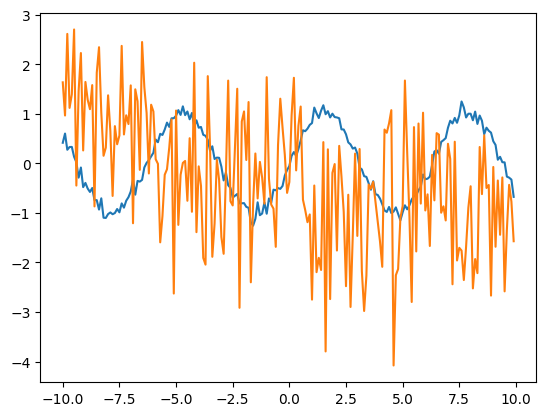

In [ ]:
print(L)
r.Act[2].inputs.shape

[[1.43076245]]


(500, 1)